# Chapter 3. Financial Data Manipulation with Python

## Yahoo Finance Data and yfinance library

In [1]:
import pandas as pd
import numpy as np

In [2]:
#!pip install --upgrade yfinance
import yfinance as yf

### Trading dynamics of securities

In [3]:
# Download TSLA stock data from Yahoo Finance
# for the specified date range and include corporate actions
df = yf.download('TSLA',
                 start='2022-08-22',
                 end='2023-09-01',
                 actions=True)
# Display the info and 5 top rows of the DataFrame
print(df.info(),'\n')
print(df.head(),'\n')
# Display the 'Close' column of the DataFrame
print(df['Close'],'\n')
# Display the 'Open' and 'Close' columns for the specified date range
print(df.loc['2023-08-25':'2023-09-05', ['Open', 'Close']],'\n')
# Display rows where the 'Stock Splits' is carried out
print(df[(df['Stock Splits'] > 0)],'\n')

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2022-08-22 to 2023-08-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          259 non-null    float64
 1   High          259 non-null    float64
 2   Low           259 non-null    float64
 3   Close         259 non-null    float64
 4   Adj Close     259 non-null    float64
 5   Volume        259 non-null    int64  
 6   Dividends     259 non-null    float64
 7   Stock Splits  259 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.2 KB
None 

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-08-22  291.913330  292.399994  286.296661  289.913330  289.913330   
2022-08-23  291.453339  298.826660  287.923340  296.453339  296.453339   
2022-08-24  297.563324  303.646667  296.500000  297.096680  297.096680   
2022-08-25  302.359

[*********************100%%**********************]  3 of 3 completed

Price      Adj Close                         Close                      \
Ticker          AAPL      MSFT      TSLA      AAPL      MSFT      TSLA   
Date                                                                     
2022-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-08-01 -0.032552 -0.068640 -0.072489 -0.032552 -0.068640 -0.072489   
2022-09-01 -0.119756 -0.107376 -0.037589 -0.120977 -0.109267 -0.037589   
2022-10-01  0.109551 -0.003306 -0.142168  0.109551 -0.003306 -0.142168   
2022-11-01 -0.034629  0.099125 -0.144326 -0.034629  0.099125 -0.144326   

Price           High                           Low                      \
Ticker          AAPL      MSFT      TSLA      AAPL      MSFT      TSLA   
Date                                                                     
2022-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-08-01  0.076514  0.043191  0.054796  0.158337  0.059852  0.257409   
2022-09-01 -0.067499 -0.090863 -0.002

<Axes: xlabel='Date'>

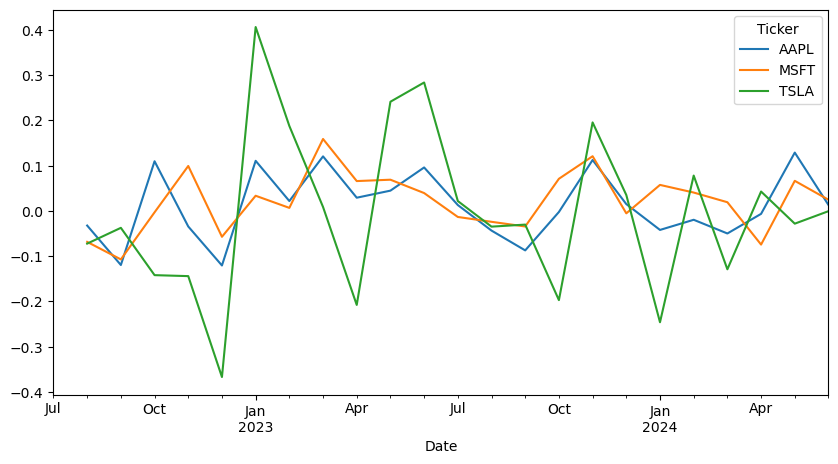

In [19]:
# Download stock data for AAPL, MSFT, and TSLA
# for the past 2 years with a monthly interval
df = yf.download(tickers=['AAPL', 'MSFT', 'TSLA'],
                 period='2y', interval='1mo',
                 actions=False)
# Calculate and display the percentage change for
# the stock data and display the first 5 rows
print(df.sort_index().pct_change().head())
# Display the 'Close' and 'Open' columns for the year 2022 for all securities
print(df.loc['2022', ['Close', 'Open']])
# Extract and display data specific to TSLA only across all columns
print(df.xs(key='TSLA', axis=1, level=1))
# Plot the percentage change of the 'Adj Close' column for all stocks
df['Adj Close'].pct_change().plot(figsize=(10,5))

### Other information about the security

In [5]:
# Initialize the Ticker object for TSLA
df_tsla = yf.Ticker("TSLA")
# Print general information about TSLA
print(df_tsla.info)
# Retrieve and display recent news articles related to TSLA
print(pd.DataFrame(df_tsla.news))
# Fetch and display the balance sheet of TSLA
print(pd.DataFrame(df_tsla.balance_sheet))

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

## Working with Diverse File Formats

### Working with Excel and CSV files with Pandas

In [20]:
# Download TSLA data for the last 3 months
df_TSLA = yf.download('TSLA', period = '3mo')
# Save the data to an Excel file
df_TSLA.to_excel('TSLA.xlsx')
# Read the data from the Excel file
df_TSLA_xlsx = pd.read_excel('TSLA.xlsx', index_col=0)
# Correct data type if needed
# Convert the 'Open' and 'Close' columns to float64 and float32 data type
df_TSLA_xlsx['Open'] = df_TSLA_xlsx['Open'].astype(float)
df_TSLA_xlsx['Close'] = df_TSLA_xlsx['Close'].astype('float32')
# Display the info and the first 5 rows of the read dataframe
df_TSLA_xlsx.info()
df_TSLA_xlsx.head()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2024-03-07 to 2024-06-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       64 non-null     float64
 1   High       64 non-null     float64
 2   Low        64 non-null     float64
 3   Close      64 non-null     float32
 4   Adj Close  64 non-null     float64
 5   Volume     64 non-null     int64  
dtypes: float32(1), float64(4), int64(1)
memory usage: 3.2 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000
2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300
2024-03-11,175.449997,182.869995,174.800003,177.770004,177.770004,85391500
2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700
2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500


In [38]:
pd.read_excel('stocks.xlsx',)

,Price,Adj Close,Unnamed: 2,Unnamed: 3,Close,Unnamed: 5,Unnamed: 6,High,Unnamed: 8,Unnamed: 9,Low,Unnamed: 11,Unnamed: 12,Open,Unnamed: 14,Unnamed: 15,Volume,Unnamed: 17,Unnamed: 18
0,Ticker,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-01 00:00:00,160.691971,275.894043,297.149994,162.509995,280.73999,297.149994,163.630005,282,298.320007,135.660004,245.940002,216.166672,136.039993,256.390015,227,1447125400,534891800,1744884000
3,2022-08-01 00:00:00,155.461151,256.956665,275.609985,157.220001,261.470001,275.609985,176.149994,294.179993,314.666656,157.139999,260.660004,271.809998,161.009995,277.820007,301.276672,1510239600,477157600,1695263200
4,2022-09-01 00:00:00,136.84375,229.365662,265.25,138.199997,232.899994,265.25,164.259995,267.450012,313.799988,138,232.729996,262.470001,156.639999,258.869995,272.579987,2084722800,575586600,1299271000
5,2022-10-01 00:00:00,151.835175,228.607346,227.539993,153.339996,232.130005,227.539993,157.5,251.039993,257.5,134.369995,219.130005,198.589996,138.210007,235.410004,254.5,1868139700,671225100,1735263100
6,2022-11-01 00:00:00,146.577301,251.268188,194.699997,148.029999,255.139999,194.699997,155.449997,255.330002,237.399994,134.380005,213.429993,166.190002,155.080002,234.600006,234.050003,1724847700,615296000,1885275300
7,2022-12-01 00:00:00,128.868347,236.846237,123.18,129.929993,239.820007,123.18,150.919998,263.920013,198.919998,125.870003,233.869995,108.239998,148.210007,253.869995,197.080002,1675731200,591358700,2944247700
8,2023-01-01 00:00:00,143.110992,244.737152,173.220001,144.289993,247.809998,173.220001,147.229996,249.830002,180.679993,124.169998,219.350006,101.809998,130.279999,243.080002,118.470001,1443652500,666168100,3897499400
9,2023-02-01 00:00:00,146.205521,246.327179,205.710007,147.410004,249.419998,205.710007,157.380005,276.76001,217.649994,141.320007,245.470001,169.929993,143.970001,248,173.889999,1307198900,615501000,3624845100


In [35]:
# Download stock data
df = yf.download(tickers=['AAPL', 'msft', 'TSLA'],
                 period = '2y', interval = '1mo')
# Save to Excel
df.to_excel('stocks.xlsx',
            sheet_name = 'Stocks2y1mo')
# Read from Excel with 'Date' as index and skip the 2th row
df_xlsx = pd.read_excel('stocks.xlsx',
                        index_col=0, header=[0, 1], skiprows=[2])
# Rename the index column to 'Date'
df_xlsx.index.name = 'Date'
# Convert the 'Close' column to float32 data type
df_TSLA_xlsx['Close'] = df_TSLA_xlsx['Close'].astype('float32')
# Display info and table head
print(df_xlsx.info())
print(df_xlsx.head())

[*********************100%%**********************]  3 of 3 completed


FileNotFoundError: [Errno 2] No such file or directory: 'stocks2.xlsx'

In [8]:
# Download TSLA data for the last 3 months
df_TSLA = yf.download('TSLA', period = '3mo')
# Save the data to a CSV file
df_TSLA.to_csv('TSLA.csv')
# Read the data from the CSV file
df_TSLA_csv = pd.read_csv('TSLA.csv', index_col = ['Date'],
                          parse_dates = True,)
# Display the info and the first 5 rows of the read dataframe
df_TSLA_csv.info()
df_TSLA_csv.head()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2024-03-07 to 2024-06-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       64 non-null     float64
 1   High       64 non-null     float64
 2   Low        64 non-null     float64
 3   Close      64 non-null     float64
 4   Adj Close  64 non-null     float64
 5   Volume     64 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.5 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000
2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300
2024-03-11,175.449997,182.869995,174.800003,177.770004,177.770004,85391500
2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700
2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500


In [9]:
# Download stock data
df = yf.download(tickers=['AAPL', 'msft', 'TSLA'],
                 period = '2y', interval = '1mo')
# Create 1-row header
# Join the multi-level columns and rename the columns
df.columns = ['_'.join(col).strip() for col in df.columns.values]
print(df.head())
# Save the data to a CSV file
df.to_csv(path_or_buf = 'stocks.csv',
          decimal = '.', sep=',', header=True)
# Save the data to a TSV file
df.to_csv(path_or_buf = 'stocks.tsv',
          decimal = '.', sep='\t', header=True)
# Read stock data from a CSV file with specified parameters
df_csv = pd.read_csv(filepath_or_buffer = 'stocks.csv',
                    index_col = ['Date'],
                    parse_dates = True,
                    decimal = '.', sep = ',' )
# Display the info and first 5 rows of the dataframe
print(df_csv.info())
print(df_csv.head())

[*********************100%%**********************]  3 of 3 completed

            Adj Close_AAPL  Adj Close_MSFT  Adj Close_TSLA  Close_AAPL  \
Date                                                                     
2022-07-01      160.691971      275.894043      297.149994  162.509995   
2022-08-01      155.461151      256.956696      275.609985  157.220001   
2022-09-01      136.843750      229.365662      265.250000  138.199997   
2022-10-01      151.835175      228.607330      227.539993  153.339996   
2022-11-01      146.577301      251.268143      194.699997  148.029999   

            Close_MSFT  Close_TSLA   High_AAPL   High_MSFT   High_TSLA  \
Date                                                                     
2022-07-01  280.739990  297.149994  163.630005  282.000000  298.320007   
2022-08-01  261.470001  275.609985  176.149994  294.179993  314.666656   
2022-09-01  232.899994  265.250000  164.259995  267.450012  313.799988   
2022-10-01  232.130005  227.539993  157.500000  251.039993  257.500000   
2022-11-01  255.139999  194.699997  1

In [10]:
# Read TSLA stock data from Yahoo Finance URL into a DataFrame
# The latest URL can be found on ynance.yahoo.com site (Historical data View)
url = 'https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1609459200&period2=1917216000&interval=1d&events=history&includeAdjustedClose=true'
df_url = pd.read_csv(url, parse_dates = True, index_col=['Date'])

# Display the info of the DataFrame
print(df_url.info())

# Display the first 5 rows of the DataFrame
print(df_url.head())

# Save the DataFrame to a CSV file
df_url.to_csv('TSLA.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 862 entries, 2021-01-04 to 2024-06-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       862 non-null    float64
 1   High       862 non-null    float64
 2   Low        862 non-null    float64
 3   Close      862 non-null    float64
 4   Adj Close  862 non-null    float64
 5   Volume     862 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.1 KB
None
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  239.820007  248.163330  239.063339  243.256668  243.256668   
2021-01-05  241.220001  246.946671  239.733337  245.036667  245.036667   
2021-01-06  252.830002  258.000000  249.699997  251.993332  251.993332   
2021-01-07  259.209991  272.329987  258.399994  272.013336  272.013336   
2021-01-08  285.333344  294.829987  279.463318  293.33999

## Open data sources and Python library for getting data

In [11]:
# Install Quandl
# !pip install quandl

# Install pandas_datareader
# !pip install --upgrade pandas-datareader

In [12]:
# Importing libraries
import quandl
import pandas_datareader as pdr
# Set API Key
quandl.ApiConfig.api_key = 'Your API key'

In [13]:
# Get Data from the Hong Kong Exchange
# Lenovo Group (Ticker 00992)
# Stock Prices for Lenovo Group from the Hong Kong Stock Exchange. Currency: HKD
# https://data.nasdaq.com/data/HKEX/00992-lenovo-group-00992
data = quandl.get('HKEX/00992', start_date='2022-08-01',
                  end_date='2023-10-10')

# Inspect and display Data
print(data.info())
print(data.head())

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Nasdaq Data Link account and then include your API key with your requests.

In [ ]:
# Get Data from the Bombay Stock Exchange
# INFOSYS LTD. EOD Prices (Ticker BOM500209)
# End of Day (EOD) prices and additional trading information for INFOSYS LTD.
# https://data.nasdaq.com/data/BSE/BOM500209-infosys-ltd-eod-prices
data = quandl.get('BSE/BOM500209', start_date='2022-08-01',
                  end_date='2023-10-10')

# Inspect and display Data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2022-08-01 to 2023-09-01
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       270 non-null    float64
 1   High                       270 non-null    float64
 2   Low                        270 non-null    float64
 3   Close                      270 non-null    float64
 4   WAP                        270 non-null    float64
 5   No. of Shares              270 non-null    float64
 6   No. of Trades              270 non-null    float64
 7   Total Turnover             270 non-null    float64
 8   Deliverable Quantity       269 non-null    float64
 9   % Deli. Qty to Traded Qty  269 non-null    float64
 10  Spread H-L                 270 non-null    float64
 11  Spread C-O                 270 non-null    float64
dtypes: float64(12)
memory usage: 27.4 KB
None
              Open    High      Low    Close 

In [40]:
import pandas_datareader as pdr
# Fetching data from FRED (Federal Reserve Economic Data)
# 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
# More details: https://fred.stlouisfed.org/tags/series
data_t10y2y = pdr.get_data_fred('T10Y2Y')
print("10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity:\n",
      data_t10y2y.head(), "\n")
# Federal Funds Effective Rate
# More details: https://fred.stlouisfed.org/series/FEDFUNDS
data_fedfunds = pdr.get_data_fred('FEDFUNDS')
print("Federal Funds Effective Rate:\n",
      data_fedfunds.head(), "\n")
# Fetching data using Alpha Vantage API source
# More details: https://www.alphavantage.co/documentation/
start_date = '2022-08-22'
data_av_tsla = pdr.get_data_alphavantage("TSLA", 
                                         api_key='YourAPI1', 
                                         start=start_date)
print(f"TSLA data from Alpha Vantage starting from: \n",
      data_av_tsla.head(), "\n")
# Using pandas_datareader.data to fetch data
import pandas_datareader.data as web
# Fetching daily data for TSLA from Alpha Vantage
data_web_av_tsla = web.DataReader("TSLA", "av-daily", 
                                  api_key='ABC123', 
                                  start=start_date)
print(f"Daily data for TSLA from Alpha Vantage starting from:\n",
      data_web_av_tsla[0:5], "\n")
# Fetching 5 Industry Portfolios data from Ken French's Data Library
# More details: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
data_industry = web.DataReader('5_Industry_Portfolios', 
                               'famafrench')
print("5 Industry Portfolios data from Ken French's Data Library")
for k in data_industry.keys():
  print(data_industry[k][0:5])

10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity:
             T10Y2Y
DATE              
2019-06-10    0.25
2019-06-11    0.22
2019-06-12    0.25
2019-06-13    0.27
2019-06-14    0.25 

Federal Funds Effective Rate:
             FEDFUNDS
DATE                
2019-07-01      2.40
2019-08-01      2.13
2019-09-01      2.04
2019-10-01      1.83
2019-11-01      1.55 

TSLA data from Alpha Vantage starting from: 
               open      high     low   close    volume
2022-08-22  875.74  877.2000  858.89  869.74  18614449
2022-08-23  874.36  896.4799  863.77  889.36  21328348
2022-08-24  892.69  910.9400  889.50  891.29  19086572
2022-08-25  302.36  302.9600  291.60  296.07  52827378
2022-08-26  297.43  302.0000  287.47  288.09  57163947 

Daily data for TSLA from Alpha Vantage starting from:
               open      high     low   close    volume
2022-08-22  875.74  877.2000  858.89  869.74  18614449
2022-08-23  874.36  896.4799  863.77  889.36  21328348
2022-08-24

/var/folders/02/hsxm96k91cl40xffg5xlqvhm0000gn/T/ipykernel_17116/2313951771.py:31: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_industry = web.DataReader('5_Industry_Portfolios',
/var/folders/02/hsxm96k91cl40xffg5xlqvhm0000gn/T/ipykernel_17116/2313951771.py:31: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_industry = web.DataReader('5_Industry_Portfolios',
/var/folders/02/hsxm96k91cl40xffg5xlqvhm0000gn/T/ipykernel_17116/2313951771.py:31: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_industry = web.DataReader('5_In

## Low-level APIs

### Binance API: run only offline. DOES NOT WORK in Google Colab

In [ ]:
# https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-data
# Kline/candlestick bars for a symbol.
# Klines are uniquely identified by their open time.
# Parameters:
# Name	Type	Mandatory	Description
# symbol	STRING	YES
# interval	ENUM	YES
# startTime	LONG	NO
# endTime	LONG	NO
# limit	INT	NO	Default 500; max 1000.
# Request: https://api.binance.com/api/v3/klines?interval=1d&limit=1000&symbol=<TICKER>

url = 'https://api.binance.com/api/v1/klines?symbol=ETHBTC&interval=1d'
df = pd.read_json(url)
# Response:
#[
#  [
#    1499040000000,      // Kline open time
#    "0.01634790",       // Open price
#    "0.80000000",       // High price
#    "0.01575800",       // Low price
#    "0.01577100",       // Close price
#    "148976.11427815",  // Volume
#    1499644799999,      // Kline Close time
#    "2434.19055334",    // Quote asset volume
#    308,                // Number of trades
#    "1756.87402397",    // Taker buy base asset volume
#    "28.46694368",      // Taker buy quote asset volume
#    "0"                 // Unused field, ignore.
#  ]
#]

df.columns = ['date','open','high','low','close','volume',
              'close time','quote asset volume',
              'number of trades','taker buy base asset volume',
              'Taker buy quote asset volume','unused']
df['date'] =  pd.to_datetime(df['date'], unit = 'ms')
df.set_index('date',inplace=True)
print("Historical Candlestick Data (Last 5 Days):")
print(df.head())


Historical Candlestick Data (Last 5 Days):
                open      high       low     close       volume  \
date                                                              
2022-05-27  0.061373  0.062325  0.059793  0.060334  246573.4627   
2022-05-28  0.060334  0.062217  0.060159  0.061731  146078.3526   
2022-05-29  0.061732  0.061962  0.061057  0.061541   90799.2918   
2022-05-30  0.061541  0.063098  0.061441  0.062991  149815.4541   
2022-05-31  0.062991  0.063269  0.060960  0.061062  157633.8933   

               close time  quote asset volume  number of trades  \
date                                                              
2022-05-27  1653695999999        15024.382970            298316   
2022-05-28  1653782399999         8953.503337            139847   
2022-05-29  1653868799999         5589.875179             96868   
2022-05-30  1653955199999         9329.637854            178438   
2022-05-31  1654041599999         9762.035058            215453   

            take

In [42]:
import requests
headers = {"Content-Type": "application/json; charset=utf-8"}

crypto_ticket = 'ETHBTC'

klines_ticket = pd.DataFrame.from_dict(requests.get('https://api.binance.com/api/v3/klines?interval=1d&limit=1000&symbol='+
                                                    crypto_ticket, headers=headers).json())

def set_kline_names(ticker_row_data):
    df = ticker_row_data
    df = df.set_axis(['date','open','high','low',
                      'close','volume', 
                      'close time','quote asset volume',
                      'number of trades',
                      'taker buy base asset volume',
                      'Taker buy quote asset volume',
                      'unused'], axis=1)
    df['date'] = pd.to_datetime(df['date'], unit = 'ms')
    df.set_index('date', inplace=True)
    return df
print("\nHistorical Candlestick Data (Last 5 Days):")
print(set_kline_names(klines_ticket))


Historical Candlestick Data (Last 5 Days):
                  open        high         low       close           volume  \
date                                                                          
2021-09-12  0.07233000  0.07525100  0.07204700  0.07397600   85844.03340000   
2021-09-13  0.07397200  0.07412500  0.07130000  0.07310200  121772.01430000   
2021-09-14  0.07310200  0.07371400  0.07159300  0.07290500   86251.09050000   
2021-09-15  0.07290600  0.07509900  0.07166200  0.07509200  116676.84620000   
2021-09-16  0.07509600  0.07613800  0.07402200  0.07472800  102871.09090000   
...                ...         ...         ...         ...              ...   
2024-06-03  0.05579000  0.05581000  0.05443000  0.05474000   26016.43160000   
2024-06-04  0.05475000  0.05475000  0.05360000  0.05402000   28082.07740000   
2024-06-05  0.05401000  0.05453000  0.05294000  0.05437000   31845.94830000   
2024-06-06  0.05437000  0.05447000  0.05359000  0.05386000   17490.55200000   
2024-06-

### Essentials of Web Scraping and BeautifulSoup library

In [ ]:
# UNCOMMENT to install
# !conda install -c conda-forge -y beautifulsoup4

In [58]:
import requests
from bs4 import BeautifulSoup
url = "https://finance.yahoo.com/quote/TSLA/history?p=TSLA"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
# Find the historical data table
table = soup.find('table')
rows = table.find_all('tr')
data = list()
for row in rows[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) == 7: # Skip divedents and splits
        row_data = {'Date': columns[0].text,
                    'Open':columns[1].text,
                    'Close':columns[4].text,
                    'Volumes': columns[6].text}
    data.append(row_data)
print(pd.DataFrame(data))

             Date    Open   Close      Volumes
0     Jun 6, 2024  174.60  177.94   69,578,400
1     Jun 5, 2024  175.35  175.00   57,953,800
2     Jun 4, 2024  174.78  174.77   60,056,300
3     Jun 3, 2024  178.13  176.29   68,568,900
4    May 31, 2024  178.50  178.08   67,314,600
..            ...     ...     ...          ...
247  Jun 13, 2023  253.51  258.71  162,384,300
248  Jun 12, 2023  247.94  249.83  150,337,900
249   Jun 9, 2023  249.07  244.40  199,882,300
250   Jun 8, 2023  224.22  234.86  164,489,700
251   Jun 7, 2023  228.00  224.57  185,710,800

[252 rows x 4 columns]


## &copy; Dr. Dmytro Zherlitsyn, 2023 <br>
## &copy; BPB Publications, 2023